# Getting the necessary libraries required

In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Yash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

# Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

checking out an example image

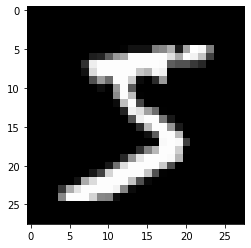

5


In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

Checking out the shapes involved in dataset

In [4]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


Reshaping to fit our neural network

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)   #number of samples, height, width, channels
X_test = X_test.reshape(10000, 28, 28, 1)     #number of samples, height, width, channels

Shape after reshaping

In [6]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


Making the label point to one of the class in our output class, for example if the label is 3 then instead of it being 3,
we make it into a list with 4th digit as 1 and others 0 - [0,0,0,1,0,0,0,0,0,0,0]

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Declaring the model

In [10]:
model = Sequential()
# Adding layers to the model
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))  # kernel size is the size of the filter matrix,
                                                                                  # 3x3 in our case
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compiling the model

using adam which is the most commonly used optimizer and metrix as accuracy to focus on accuracy

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training our model

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2967 - accuracy: 0.9528 - val_loss: 0.1004 - val_accuracy: 0.9683
Epoch 2/3
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0621 - accuracy: 0.9814 - val_loss: 0.0750 - val_accuracy: 0.9796
Epoch 3/3
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.1047 - val_accuracy: 0.9735


# Testing 

with an example from the training set itself

In [41]:
example = X_train[7]
prediction = model.predict(example.reshape(1, 28, 28, 1))

Comparing softmax, hardmax and image prediction

In [42]:
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))

Prediction (Softmax) from the neural network:

 [[3.5241050e-11 1.7736670e-12 2.0781171e-08 1.0000000e+00 1.4997060e-16
  5.4664060e-12 1.2445473e-17 1.6985869e-11 2.0614435e-10 3.6648617e-10]]


In [43]:
hard_maxed_prediction = np.zeros(prediction.shape)   #converting softmax to a list with 0s and 1s
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))



Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]




--------- Prediction --------- 




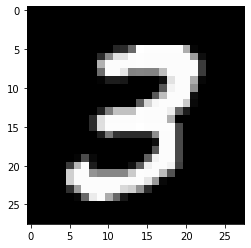



Final Output: 3


In [44]:
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")     
plt.show()                                         #displays the image
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

# Testing with our own image

Has several steps involved
1) the image is converted to grayscale format
2) the converted image is then binarized, which means only the digit stays white and everything else in bcakground becomes black
3) If there are several digits in the image each image is stored
4) The digits are cropped to 18x18 instead of 28x28 so that they can be in center like mnist digits and a padding of 5 is added on height and width to make it 28x28 while predicting 




----------------Contoured Image--------------------


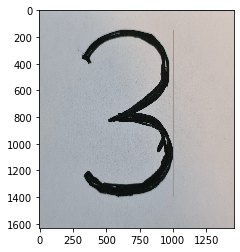

In [49]:
image = cv2.imread(r'C:\Users\Yash\Desktop\KTH\Sem1-p2-AI\ProjectNn\normal\3.jpg') #input the image location
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)                              #converts the image to grayscale
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)           #makes digit in image white and everything else black
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []                                                           #list to store image array
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

Shows the image, softmax and hardmax prediction

=========PREDICTION============ 




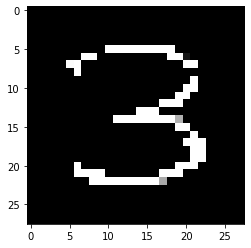



Final Output: 3

Prediction (Softmax) from the neural network:

 [[9.8759990e-23 1.2276128e-28 2.1215488e-10 1.0000000e+00 7.6574605e-27
  3.1469245e-18 6.9571189e-16 2.9492154e-15 1.6541819e-09 9.7112124e-15]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [50]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

In [51]:
model.save("working!.h5")